In [0]:
%pip install folium plotly numpy matplotlib

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# load testing library
import os.path
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from jinja2 import Template 
from folium.map import Layer

from pyspark.sql.types import *
from pyspark.sql.functions import col, month, to_date
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

origin_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/ybcho@connect.ust.hk/cities_temp-1.csv")
pca_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/ybcho@connect.ust.hk/data_with_pca.csv")

In [0]:
pca_df.take(5)

Out[2]: [Row(YEAR='1981', DOY='1', T10M='4.82', CLOUD_AMT='61.397109077812026', QV10M='3.54', PW='2.4299619817471223', PS='101.68', GLOBAL_ILLUMINANCE='34868.50815731465', WS10M='13.59', EVLAND='29.29', latitude='52.3730796', longitude='4.8924534', PCA1='34868.41834076669', PCA2='-98.83160356343025', PCA3='8.61971517477442'),
 Row(YEAR='1981', DOY='1', T10M='8.85', CLOUD_AMT='61.397109077812026', QV10M='4.52', PW='2.4299619817471223', PS='100.08', GLOBAL_ILLUMINANCE='34868.50815731465', WS10M='2.06', EVLAND='7.65', latitude='37.9839412', longitude='23.7283052', PCA1='34868.41001409162', PCA2='-93.51818206444162', PCA3='29.14565765189365'),
 Row(YEAR='1981', DOY='1', T10M='24.87', CLOUD_AMT='61.397109077812026', QV10M='11.47', PW='2.4299619817471223', PS='101.05', GLOBAL_ILLUMINANCE='34868.50815731465', WS10M='2.59', EVLAND='27.5', latitude='13.7524938', longitude='100.4935089', PCA1='34868.41905175059', PCA2='-98.91995076055906', PCA3='9.26300349859807'),
 Row(YEAR='1981', DOY='1', T10

In [0]:
origin_df = origin_df.withColumn("YEAR",origin_df["YEAR"].cast(IntegerType()))
origin_df = origin_df.withColumn("DOY",origin_df["DOY"].cast(IntegerType()))
origin_df = origin_df.withColumn("T10M",origin_df["T10M"].cast(DoubleType()))
origin_df = origin_df.withColumn("CLOUD_AMT",origin_df["CLOUD_AMT"].cast(DoubleType()))
origin_df = origin_df.withColumn("QV10M",origin_df["QV10M"].cast(DoubleType()))
origin_df = origin_df.withColumn("PW",origin_df["PW"].cast(DoubleType()))
origin_df = origin_df.withColumn("PS",origin_df["PS"].cast(DoubleType()))
origin_df = origin_df.withColumn("GLOBAL_ILLUMINANCE",origin_df["GLOBAL_ILLUMINANCE"].cast(DoubleType()))
origin_df = origin_df.withColumn("WS10M",origin_df["WS10M"].cast(DoubleType()))
origin_df = origin_df.withColumn("EVLAND",origin_df["EVLAND"].cast(DoubleType()))
origin_df = origin_df.withColumn("latitude",origin_df["latitude"].cast(DoubleType()))
origin_df = origin_df.withColumn("longitude",origin_df["longitude"].cast(DoubleType()))

origin_df.take(5)

Out[3]: [Row(_c0='0', YEAR=1981, DOY=1, T10M=4.82, CLOUD_AMT=61.397109077812026, QV10M=3.54, PW=2.4299619817471223, PS=101.68, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=13.59, EVLAND=29.29, latitude=52.3730796, longitude=4.8924534, City='Amsterdam', month='1'),
 Row(_c0='1', YEAR=1981, DOY=1, T10M=8.85, CLOUD_AMT=61.397109077812026, QV10M=4.52, PW=2.4299619817471223, PS=100.08, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=2.06, EVLAND=7.65, latitude=37.9839412, longitude=23.7283052, City='Athens', month='1'),
 Row(_c0='2', YEAR=1981, DOY=1, T10M=24.87, CLOUD_AMT=61.397109077812026, QV10M=11.47, PW=2.4299619817471223, PS=101.05, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=2.59, EVLAND=27.5, latitude=13.7524938, longitude=100.4935089, City='Bangkok', month='1'),
 Row(_c0='3', YEAR=1981, DOY=1, T10M=8.37, CLOUD_AMT=61.397109077812026, QV10M=3.85, PW=2.4299619817471223, PS=99.36, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=3.42, EVLAND=3.94, latitude=41.3828939, longitude=2.1774322, City=

In [0]:
origin_df = origin_df.withColumn("YEAR",origin_df["YEAR"].cast(IntegerType()))
origin_df = origin_df.withColumn("DOY",origin_df["DOY"].cast(IntegerType()))
origin_df = origin_df.withColumn("T10M",origin_df["T10M"].cast(DoubleType()))
origin_df = origin_df.withColumn("CLOUD_AMT",origin_df["CLOUD_AMT"].cast(DoubleType()))
origin_df = origin_df.withColumn("QV10M",origin_df["QV10M"].cast(DoubleType()))
origin_df = origin_df.withColumn("PW",origin_df["PW"].cast(DoubleType()))
origin_df = origin_df.withColumn("PS",origin_df["PS"].cast(DoubleType()))
origin_df = origin_df.withColumn("GLOBAL_ILLUMINANCE",origin_df["GLOBAL_ILLUMINANCE"].cast(DoubleType()))
origin_df = origin_df.withColumn("WS10M",origin_df["WS10M"].cast(DoubleType()))
origin_df = origin_df.withColumn("EVLAND",origin_df["EVLAND"].cast(DoubleType()))
origin_df = origin_df.withColumn("latitude",origin_df["latitude"].cast(DoubleType()))
origin_df = origin_df.withColumn("longitude",origin_df["longitude"].cast(DoubleType()))

origin_df.take(5)

Out[4]: [Row(_c0='0', YEAR=1981, DOY=1, T10M=4.82, CLOUD_AMT=61.397109077812026, QV10M=3.54, PW=2.4299619817471223, PS=101.68, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=13.59, EVLAND=29.29, latitude=52.3730796, longitude=4.8924534, City='Amsterdam', month='1'),
 Row(_c0='1', YEAR=1981, DOY=1, T10M=8.85, CLOUD_AMT=61.397109077812026, QV10M=4.52, PW=2.4299619817471223, PS=100.08, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=2.06, EVLAND=7.65, latitude=37.9839412, longitude=23.7283052, City='Athens', month='1'),
 Row(_c0='2', YEAR=1981, DOY=1, T10M=24.87, CLOUD_AMT=61.397109077812026, QV10M=11.47, PW=2.4299619817471223, PS=101.05, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=2.59, EVLAND=27.5, latitude=13.7524938, longitude=100.4935089, City='Bangkok', month='1'),
 Row(_c0='3', YEAR=1981, DOY=1, T10M=8.37, CLOUD_AMT=61.397109077812026, QV10M=3.85, PW=2.4299619817471223, PS=99.36, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=3.42, EVLAND=3.94, latitude=41.3828939, longitude=2.1774322, City=

In [0]:
def collect_monthly_info(df):
    average_data = df.groupBy("latitude", "longitude") \
    .agg({"T10M": "avg", "QV10M": "avg", "GLOBAL_ILLUMINANCE": "avg"}) \
    .withColumnRenamed("avg(T10M)", "avg_temperature") \
    .withColumnRenamed("avg(QV10M)", "avg_humidity") \
    .withColumnRenamed("avg(GLOBAL_ILLUMINANCE)", "avg_solar_radiation")
    
    # Collect data as a list of tuples (latitude, longitude, avg_temperature)
    temperature_data = average_data.select("latitude", "longitude", "avg_temperature").collect()
    humidity_data = average_data.select("latitude", "longitude", "avg_humidity").collect()
    solar_radiation_data = average_data.select("latitude", "longitude", "avg_solar_radiation").collect()

    return temperature_data, humidity_data, solar_radiation_data

In [0]:
def create_map(temperature_data, humidity_data, solar_radiation_data):

    # Create base map
    map_center = [0, 0]
    zoom_start = 2
    
    m = folium.Map(location=map_center, zoom_start=zoom_start)
   
    HeatMap(temperature_data).add_to(m)
    HeatMap(humidity_data).add_to(m)
    HeatMap(solar_radiation_data).add_to(m)
    
    folium.LayerControl().add_to(m)
    #folium.TileLayer('openstreetmap', name='my tilelayer').add_to(m)

    return m


In [0]:
jan_temp, jan_hum, jan_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 1))
m = create_map(jan_temp, jan_hum, jan_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_0807b1401baaf4fda494e9a7c5d2780a {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_0807b1401baaf4fda494e9a7c5d2780a" ></div>
 
</body>
<script>
 
 
 var map_0807b1401baaf4fda494e9a7c5d2780a = L.map(
 "map_0807b1401baaf4fda494e9a7c5d2780a",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_d5da68a330cea37e07addae5c16879f0 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_0807b1401baaf4fda494e9a7c5d2780a);
 
 
 var heat_map_de88fecb599cdc5d48fb410707dbf94f = L.heatLayer(
 [[47.3744489, 8.5410422, -0.041904012588512826], [30.0443879, 31.2357257, 12.465318646734852], [-12.0621065, -77.0365256, 18.853571990558617], [-22.9110137, -43.2093727, 25.64642014162077], [35.6812665, 139.757653, 5.1236270653029115], [43.6534817, -79.3839347, -3.19822974036192], [21.0283207, 105.8540217, 16.05094413847365], [55.7504461, 37.6174943, -10.044162077104643], [19.0785451, 72.878176, 23.80283241542093], [41.0091982, 28.9662187, 5.904752163650669], [50.8465573, 4.351697, 2.606294256490952], [39.906217, 116.3912757, -4.781306058221873], [59.9133301, 10.7389701, -5.578025177025964], [-1.2832533, 36.8172449, 19.715090479937068], [52.5170365, 13.3888599, -0.579087332808812], [19.4326296, -99.1331785, 10.650739575137685], [6.4550575, 3.3941795, 26.532155782848147], [14.5948914, 120.9782618, 23.51816679779701], [60.1674881, 24.9427473, -3.352525570416994], [22.2793278, 114.1628131, 15.834547600314716], [50.0874654, 14.4212535, -2.047324940991345], [40.7127281, -74.0060152, 0.8479858379228955], [9.8694792, -83.7980749, 19.021471282454762], [-34.6075682, -58.4370894, 24.45852084972463], [25.0375198, 121.5636796, 16.671369000786786], [48.2083537, 16.3725042, -1.3162

In [0]:
feb_temp, feb_hum, feb_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 2))
m = create_map(feb_temp, feb_hum, feb_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_d5729d8d80c313e896f0d1bdcf1d564b {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_d5729d8d80c313e896f0d1bdcf1d564b" ></div>
 
</body>
<script>
 
 
 var map_d5729d8d80c313e896f0d1bdcf1d564b = L.map(
 "map_d5729d8d80c313e896f0d1bdcf1d564b",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_a91915f9c34c081daf677c89030535ae = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_d5729d8d80c313e896f0d1bdcf1d564b);
 
 
 var heat_map_4cc6e77182a0674cdc4df5ca71c93a37 = L.heatLayer(
 [[47.3744489, 8.5410422, 0.838756476683938], [30.0443879, 31.2357257, 13.582072538860103], [-12.0621065, -77.0365256, 19.524930915371332], [-22.9110137, -43.2093727, 25.85368739205527], [35.6812665, 139.757653, 5.58818652849741], [43.6534817, -79.3839347, -2.8687910189982735], [21.0283207, 105.8540217, 18.41299654576857], [55.7504461, 37.6174943, -9.31523316062176], [19.0785451, 72.878176, 25.60170120898101], [41.0091982, 28.9662187, 6.004274611398963], [50.8465573, 4.351697, 2.9922884283246973], [39.906217, 116.3912757, -1.2834283246977545], [59.9133301, 10.7389701, -4.9633074265975825], [-1.2832533, 36.8172449, 20.70024179620034], [52.5170365, 13.3888599, 0.3597582037996548], [19.4326296, -99.1331785, 12.076968911917096], [6.4550575, 3.3941795, 27.348264248704673], [14.5948914, 120.9782618, 23.975526770293612], [60.1674881, 24.9427473, -4.4017789291882545], [22.2793278, 114.1628131, 17.236364421416237], [50.0874654, 14.4212535, -0.7932297063903281], [40.7127281, -74.0060152, 1.3684801381692577], [9.8694792, -83.7980749, 19.256511226252165], [-34.6075682, -58.4370894, 23.71145941278066], [25.0375198, 121.5636796, 17.177728842832472], [48.2083537, 16.3725042, 0.085967

In [0]:
mar_temp, mar_hum, mar_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 3))
m = create_map(mar_temp, mar_hum, mar_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_6fcf3d2d2bff8462240c50a34865cb70 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_6fcf3d2d2bff8462240c50a34865cb70" ></div>
 
</body>
<script>
 
 
 var map_6fcf3d2d2bff8462240c50a34865cb70 = L.map(
 "map_6fcf3d2d2bff8462240c50a34865cb70",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_fb382faf2027c83b1afd1a4f9ad6b453 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_6fcf3d2d2bff8462240c50a34865cb70);
 
 
 var heat_map_c9470489e91c44691eb041e2e5c5c2f3 = L.heatLayer(
 [[47.3744489, 8.5410422, 4.765019669551535], [30.0443879, 31.2357257, 16.4479858379229], [-12.0621065, -77.0365256, 19.60791502753738], [-22.9110137, -43.2093727, 25.35405192761605], [35.6812665, 139.757653, 8.788528717545239], [43.6534817, -79.3839347, 0.7383556254917386], [21.0283207, 105.8540217, 21.91862313139261], [55.7504461, 37.6174943, -3.800936270653029], [19.0785451, 72.878176, 28.431455546813524], [41.0091982, 28.9662187, 7.954925255704171], [50.8465573, 4.351697, 6.091188040912668], [39.906217, 116.3912757, 5.122116443745084], [59.9133301, 10.7389701, -1.4298033044846576], [-1.2832533, 36.8172449, 20.878379228953587], [52.5170365, 13.3888599, 3.9092289535798583], [19.4326296, -99.1331785, 13.861542092840287], [6.4550575, 3.3941795, 27.602431156569626], [14.5948914, 120.9782618, 25.317631785995285], [60.1674881, 24.9427473, -1.5132808811959084], [22.2793278, 114.1628131, 19.858985051140838], [50.0874654, 14.4212535, 3.4002360346184104], [40.7127281, -74.0060152, 4.223194335169159], [9.8694792, -83.7980749, 19.92105428796224], [-34.6075682, -58.4370894, 22.07125098347758], [25.0375198, 121.5636796, 18.895719905586162], [48.2083537, 16.3725042, 4.288599527930

In [0]:
apr_temp, apr_hum, apr_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 4))
m = create_map(apr_temp, apr_hum, apr_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_afdea739666e10e52d69b0235f65646f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_afdea739666e10e52d69b0235f65646f" ></div>
 
</body>
<script>
 
 
 var map_afdea739666e10e52d69b0235f65646f = L.map(
 "map_afdea739666e10e52d69b0235f65646f",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_ce6c600c25681e9d4d494b2ec37ee723 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_afdea739666e10e52d69b0235f65646f);
 
 
 var heat_map_e71060ac89437bf8712a0d8e46c26284 = L.heatLayer(
 [[47.3744489, 8.5410422, 8.600536585365852], [30.0443879, 31.2357257, 20.726902439024393], [-12.0621065, -77.0365256, 18.97671544715447], [-22.9110137, -43.2093727, 24.20038211382113], [35.6812665, 139.757653, 13.617569105691057], [43.6534817, -79.3839347, 6.044869918699189], [21.0283207, 105.8540217, 25.66352032520325], [55.7504461, 37.6174943, 4.602983739837399], [19.0785451, 72.878176, 30.06121951219512], [41.0091982, 28.9662187, 12.126951219512193], [50.8465573, 4.351697, 9.198065040650405], [39.906217, 116.3912757, 13.377691056910571], [59.9133301, 10.7389701, 3.6979837398373987], [-1.2832533, 36.8172449, 19.974658536585373], [52.5170365, 13.3888599, 8.67279674796748], [19.4326296, -99.1331785, 15.76130081300813], [6.4550575, 3.3941795, 27.473487804878054], [14.5948914, 120.9782618, 27.06565040650407], [60.1674881, 24.9427473, 3.168959349593496], [22.2793278, 114.1628131, 22.994804878048782], [50.0874654, 14.4212535, 8.301731707317073], [40.7127281, -74.0060152, 9.073276422764227], [9.8694792, -83.7980749, 20.819186991869916], [-34.6075682, -58.4370894, 18.696040650406506], [25.0375198, 121.5636796, 21.79334146341464], [48.2083537, 16.3725042, 9.304821138211382],

In [0]:
may_temp, may_hum, may_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 5))
m = create_map(may_temp, may_hum, may_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_59b0d1aec7d9acf9a7035613378ff9aa {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_59b0d1aec7d9acf9a7035613378ff9aa" ></div>
 
</body>
<script>
 
 
 var map_59b0d1aec7d9acf9a7035613378ff9aa = L.map(
 "map_59b0d1aec7d9acf9a7035613378ff9aa",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_da266275060496dde5c6a142891af7c2 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_59b0d1aec7d9acf9a7035613378ff9aa);
 
 
 var heat_map_3c67816c80938eed7d92c7117489001b = L.heatLayer(
 [[47.3744489, 8.5410422, 13.081746656176238], [30.0443879, 31.2357257, 24.85424075531078], [-12.0621065, -77.0365256, 18.09423288749017], [-22.9110137, -43.2093727, 22.397128245476004], [35.6812665, 139.757653, 18.15042486231314], [43.6534817, -79.3839347, 12.119889850511413], [21.0283207, 105.8540217, 27.873068450039337], [55.7504461, 37.6174943, 12.271738788355627], [19.0785451, 72.878176, 30.392509834775765], [41.0091982, 28.9662187, 17.080857592446893], [50.8465573, 4.351697, 13.213564122738003], [39.906217, 116.3912757, 20.269409913453977], [59.9133301, 10.7389701, 9.632722265932335], [-1.2832533, 36.8172449, 18.79796223446106], [52.5170365, 13.3888599, 13.79983477576711], [19.4326296, -99.1331785, 16.510818253343828], [6.4550575, 3.3941795, 27.053422501966956], [14.5948914, 120.9782618, 27.781274586939418], [60.1674881, 24.9427473, 8.759055861526358], [22.2793278, 114.1628131, 25.87752163650669], [50.0874654, 14.4212535, 13.423202202989774], [40.7127281, -74.0060152, 14.388701809598748], [9.8694792, -83.7980749, 21.16169944925256], [-34.6075682, -58.4370894, 15.242399685287175], [25.0375198, 121.5636796, 24.64674272226594], [48.2083537, 16.3725042, 14.3584500393

In [0]:
jun_temp, jun_hum, jun_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 6))
m = create_map(jun_temp, jun_hum, jun_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_f978c15ad380992e47e7503f5a22929f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_f978c15ad380992e47e7503f5a22929f" ></div>
 
</body>
<script>
 
 
 var map_f978c15ad380992e47e7503f5a22929f = L.map(
 "map_f978c15ad380992e47e7503f5a22929f",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_5836f1de0fe5a5d075c1fce17552d123 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_f978c15ad380992e47e7503f5a22929f);
 
 
 var heat_map_5085492ddb8ba1ac25791b6c967fcd25 = L.heatLayer(
 [[47.3744489, 8.5410422, 16.658894308943086], [30.0443879, 31.2357257, 27.910040650406508], [-12.0621065, -77.0365256, 17.31841463414634], [-22.9110137, -43.2093727, 21.40337398373984], [35.6812665, 139.757653, 21.536756097560986], [43.6534817, -79.3839347, 17.929178861788625], [21.0283207, 105.8540217, 28.99178861788618], [55.7504461, 37.6174943, 16.323951219512196], [19.0785451, 72.878176, 28.395886178861783], [41.0091982, 28.9662187, 21.816292682926832], [50.8465573, 4.351697, 16.15683739837399], [39.906217, 116.3912757, 24.70583739837399], [59.9133301, 10.7389701, 13.612260162601627], [-1.2832533, 36.8172449, 18.18526016260163], [52.5170365, 13.3888599, 17.43565040650407], [19.4326296, -99.1331785, 15.549325203252037], [6.4550575, 3.3941795, 26.034569105691062], [14.5948914, 120.9782618, 27.120455284552847], [60.1674881, 24.9427473, 13.695723577235771], [22.2793278, 114.1628131, 27.60280487804878], [50.0874654, 14.4212535, 17.134601626016263], [40.7127281, -74.0060152, 19.89598373983741], [9.8694792, -83.7980749, 20.779861788617886], [-34.6075682, -58.4370894, 12.099959349593496], [25.0375198, 121.5636796, 26.943756097560982], [48.2083537, 16.3725042, 18.258617886

In [0]:
jul_temp, jul_hum, jul_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 7))
m = create_map(jul_temp, jul_hum, jul_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_b3e514df7569c9a949b39cca5936d58f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_b3e514df7569c9a949b39cca5936d58f" ></div>
 
</body>
<script>
 
 
 var map_b3e514df7569c9a949b39cca5936d58f = L.map(
 "map_b3e514df7569c9a949b39cca5936d58f",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_e312881d7bd42ff08704ec66087db6ad = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_b3e514df7569c9a949b39cca5936d58f);
 
 
 var heat_map_2023605863a8eb1abc012aaf8d586cd6 = L.heatLayer(
 [[47.3744489, 8.5410422, 18.716042486231313], [30.0443879, 31.2357257, 29.247678992918964], [-12.0621065, -77.0365256, 16.7942486231314], [-22.9110137, -43.2093727, 20.8033831628639], [35.6812665, 139.757653, 25.1991896144768], [43.6534817, -79.3839347, 21.52236821400472], [21.0283207, 105.8540217, 28.92169944925256], [55.7504461, 37.6174943, 18.578111723052718], [19.0785451, 72.878176, 26.603453973249415], [41.0091982, 28.9662187, 24.24729346970889], [50.8465573, 4.351697, 18.308001573564127], [39.906217, 116.3912757, 26.31510621557829], [59.9133301, 10.7389701, 15.916986624704956], [-1.2832533, 36.8172449, 17.999181746656177], [52.5170365, 13.3888599, 19.765538945712038], [19.4326296, -99.1331785, 14.448166797797013], [6.4550575, 3.3941795, 24.940251770259636], [14.5948914, 120.9782618, 26.349331235247835], [60.1674881, 24.9427473, 17.229228953579856], [22.2793278, 114.1628131, 28.26002360346184], [50.0874654, 14.4212535, 19.38143981117231], [40.7127281, -74.0060152, 23.507694728560192], [9.8694792, -83.7980749, 20.24341463414635], [-34.6075682, -58.4370894, 11.058937844217152], [25.0375198, 121.5636796, 28.21068450039339], [48.2083537, 16.3725042, 20.52630212431156

In [0]:
aug_temp, aug_hum, aug_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 8))
m = create_map(aug_temp, aug_hum, aug_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_6abbabdd029978bf0f3f5713a083162b {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_6abbabdd029978bf0f3f5713a083162b" ></div>
 
</body>
<script>
 
 
 var map_6abbabdd029978bf0f3f5713a083162b = L.map(
 "map_6abbabdd029978bf0f3f5713a083162b",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_72437c93a7f2b0e1b2303d2065e26275 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_6abbabdd029978bf0f3f5713a083162b);
 
 
 var heat_map_cbc046406babc670e9ae9ad03cce754c = L.heatLayer(
 [[47.3744489, 8.5410422, 18.40826907946499], [30.0443879, 31.2357257, 29.20592446892211], [-12.0621065, -77.0365256, 16.866593233674273], [-22.9110137, -43.2093727, 21.07779701022817], [35.6812665, 139.757653, 26.61693941778128], [43.6534817, -79.3839347, 21.11401258851298], [21.0283207, 105.8540217, 28.444846577498033], [55.7504461, 37.6174943, 16.762659323367423], [19.0785451, 72.878176, 25.97586152635721], [41.0091982, 28.9662187, 24.52461054287963], [50.8465573, 4.351697, 18.1004012588513], [39.906217, 116.3912757, 24.92293469708891], [59.9133301, 10.7389701, 14.579331235247837], [-1.2832533, 36.8172449, 18.44874901652243], [52.5170365, 13.3888599, 19.419252557041705], [19.4326296, -99.1331785, 14.276333595594021], [6.4550575, 3.3941795, 24.583147128245475], [14.5948914, 120.9782618, 26.152494099134547], [60.1674881, 24.9427473, 16.644815106215585], [22.2793278, 114.1628131, 28.22630999213218], [50.0874654, 14.4212535, 19.054327301337533], [40.7127281, -74.0060152, 23.26949645948073], [9.8694792, -83.7980749, 20.313823760818256], [-34.6075682, -58.4370894, 12.564618410700236], [25.0375198, 121.5636796, 28.010613690007872], [48.2083537, 16.3725042, 20.1882376081825

In [0]:
sep_temp, sep_hum, sep_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 9))
m = create_map(sep_temp, sep_hum, sep_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_4f7586199cdf4ced37bc675157b27966 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_4f7586199cdf4ced37bc675157b27966" ></div>
 
</body>
<script>
 
 
 var map_4f7586199cdf4ced37bc675157b27966 = L.map(
 "map_4f7586199cdf4ced37bc675157b27966",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_54acbfd4294448ff2c648a681d99be30 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_4f7586199cdf4ced37bc675157b27966);
 
 
 var heat_map_5184d74eb10070f3835a920c6b1a831b = L.heatLayer(
 [[47.3744489, 8.5410422, 14.557243902439025], [30.0443879, 31.2357257, 26.941504065040654], [-12.0621065, -77.0365256, 17.0559674796748], [-22.9110137, -43.2093727, 21.655162601626024], [35.6812665, 139.757653, 23.468040650406504], [43.6534817, -79.3839347, 17.359983739837396], [21.0283207, 105.8540217, 27.136853658536587], [55.7504461, 37.6174943, 10.8860081300813], [19.0785451, 72.878176, 26.16281300813009], [41.0091982, 28.9662187, 21.298211382113823], [50.8465573, 4.351697, 15.091032520325204], [39.906217, 116.3912757, 19.860203252032523], [59.9133301, 10.7389701, 10.212544715447153], [-1.2832533, 36.8172449, 19.435528455284558], [52.5170365, 13.3888599, 15.012975609756102], [19.4326296, -99.1331785, 13.710878048780492], [6.4550575, 3.3941795, 25.123146341463418], [14.5948914, 120.9782618, 26.1458861788618], [60.1674881, 24.9427473, 12.445772357723577], [22.2793278, 114.1628131, 27.329170731707315], [50.0874654, 14.4212535, 14.40661788617886], [40.7127281, -74.0060152, 20.108634146341466], [9.8694792, -83.7980749, 20.397739837398376], [-34.6075682, -58.4370894, 14.136065040650408], [25.0375198, 121.5636796, 26.533024390243906], [48.2083537, 16.3725042, 15.38608130

In [0]:
oct_temp, oct_hum, oct_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 10))
m = create_map(oct_temp, oct_hum, oct_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_d0fbf6a0c2ec2140539ec8954e3f1bd0 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_d0fbf6a0c2ec2140539ec8954e3f1bd0" ></div>
 
</body>
<script>
 
 
 var map_d0fbf6a0c2ec2140539ec8954e3f1bd0 = L.map(
 "map_d0fbf6a0c2ec2140539ec8954e3f1bd0",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_2598f580d415584d03d3858a64ed361c = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_d0fbf6a0c2ec2140539ec8954e3f1bd0);
 
 
 var heat_map_be624d1ab10ae400f75bf9f0dbc09e92 = L.heatLayer(
 [[47.3744489, 8.5410422, 10.174492525570416], [30.0443879, 31.2357257, 23.400448465774986], [-12.0621065, -77.0365256, 17.056695515342255], [-22.9110137, -43.2093727, 22.60881982690795], [35.6812665, 139.757653, 18.092911093627066], [43.6534817, -79.3839347, 10.89577498033045], [21.0283207, 105.8540217, 24.115696302124313], [55.7504461, 37.6174943, 4.280133752950433], [19.0785451, 72.878176, 26.604484657749804], [41.0091982, 28.9662187, 16.654760031471287], [50.8465573, 4.351697, 11.068481510621558], [39.906217, 116.3912757, 12.354807238394962], [59.9133301, 10.7389701, 4.850715971675846], [-1.2832533, 36.8172449, 19.936711250983485], [52.5170365, 13.3888599, 9.686742722265931], [19.4326296, -99.1331785, 12.847521636506684], [6.4550575, 3.3941795, 25.92411487018096], [14.5948914, 120.9782618, 25.864673485444538], [60.1674881, 24.9427473, 7.315059008654605], [22.2793278, 114.1628131, 24.770889063729353], [50.0874654, 14.4212535, 8.94123524783635], [40.7127281, -74.0060152, 14.580975609756099], [9.8694792, -83.7980749, 20.256711250983475], [-34.6075682, -58.4370894, 17.088103855232102], [25.0375198, 121.5636796, 24.047631785995282], [48.2083537, 16.3725042, 9.8919826907

In [0]:
nov_temp, nov_hum, nov_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 11))
m = create_map(nov_temp, nov_hum, nov_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_7799b891fe73b5ef022c93164f868a03 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_7799b891fe73b5ef022c93164f868a03" ></div>
 
</body>
<script>
 
 
 var map_7799b891fe73b5ef022c93164f868a03 = L.map(
 "map_7799b891fe73b5ef022c93164f868a03",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_c7c082d211d1abc4688d1716a900c288 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_7799b891fe73b5ef022c93164f868a03);
 
 
 var heat_map_8e35753859e1ab75badefdf7735ea390 = L.heatLayer(
 [[47.3744489, 8.5410422, 4.424398373983741], [30.0443879, 31.2357257, 18.656853658536587], [-12.0621065, -77.0365256, 17.29308130081301], [-22.9110137, -43.2093727, 23.463634146341462], [35.6812665, 139.757653, 12.920934959349594], [43.6534817, -79.3839347, 4.8795528455284565], [21.0283207, 105.8540217, 20.666731707317073], [55.7504461, 37.6174943, -2.9836666666666667], [19.0785451, 72.878176, 25.19542276422764], [41.0091982, 28.9662187, 11.914154471544713], [50.8465573, 4.351697, 6.52949593495935], [39.906217, 116.3912757, 3.545243902439024], [59.9133301, 10.7389701, -0.5777235772357724], [-1.2832533, 36.8172449, 19.459349593495936], [52.5170365, 13.3888599, 4.129211382113821], [19.4326296, -99.1331785, 11.77994308943089], [6.4550575, 3.3941795, 26.872471544715452], [14.5948914, 120.9782618, 25.19286991869919], [60.1674881, 24.9427473, 2.7220894308943095], [22.2793278, 114.1628131, 21.15934959349594], [50.0874654, 14.4212535, 3.127341463414634], [40.7127281, -74.0060152, 8.956674796747967], [9.8694792, -83.7980749, 19.926024390243903], [-34.6075682, -58.4370894, 20.036276422764228], [25.0375198, 121.5636796, 21.540300813008134], [48.2083537, 16.3725042, 3.97806504065

In [0]:
dec_temp, dec_hum, dec_rad = collect_monthly_info(origin_df.filter(origin_df["month"] == 12))
m = create_map(dec_temp, dec_hum, dec_rad)
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_e31e840ff86cc24c3562f2673034eb15 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_e31e840ff86cc24c3562f2673034eb15" ></div>
 
</body>
<script>
 
 
 var map_e31e840ff86cc24c3562f2673034eb15 = L.map(
 "map_e31e840ff86cc24c3562f2673034eb15",
 {
 center: [0.0, 0.0],
 crs: L.CRS.EPSG3857,
 zoom: 2,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_2a928518939f19bdf6bc6b235e8297a5 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_e31e840ff86cc24c3562f2673034eb15);
 
 
 var heat_map_41ed2488f73cb6f0da1988061dd06c50 = L.heatLayer(
 [[47.3744489, 8.5410422, 1.0365853658536588], [30.0443879, 31.2357257, 14.214618410700234], [-12.0621065, -77.0365256, 18.07088119590874], [-22.9110137, -43.2093727, 24.668560188827698], [35.6812665, 139.757653, 7.799795436664045], [43.6534817, -79.3839347, -0.08275373721479148], [21.0283207, 105.8540217, 16.75899291896145], [55.7504461, 37.6174943, -7.983060582218725], [19.0785451, 72.878176, 23.913988985051148], [41.0091982, 28.9662187, 7.978025177025963], [50.8465573, 4.351697, 3.5182140047206922], [39.906217, 116.3912757, -2.948780487804878], [59.9133301, 10.7389701, -4.557309205350117], [-1.2832533, 36.8172449, 19.178985051140838], [52.5170365, 13.3888599, 0.5834618410700235], [19.4326296, -99.1331785, 11.118001573564124], [6.4550575, 3.3941795, 26.83203776553895], [14.5948914, 120.9782618, 24.122533438237614], [60.1674881, 24.9427473, -0.9091738788355627], [22.2793278, 114.1628131, 16.940928402832412], [50.0874654, 14.4212535, -0.6773092053501178], [40.7127281, -74.0060152, 4.112486231313926], [9.8694792, -83.7980749, 19.434862313139263], [-34.6075682, -58.4370894, 22.767757671125104], [25.0375198, 121.5636796, 18.25703383162864], [48.2083537, 16.3725042, -0.101

In [0]:
yearly_data = origin_df.groupBy("YEAR") \
    .agg({"GLOBAL_ILLUMINANCE": "avg", "T10M": "avg", "PW": "avg"}) \
    .withColumnRenamed("avg(GLOBAL_ILLUMINANCE)", "avg_solar_radiation") \
    .withColumnRenamed("avg(T10M)", "avg_temperature") \
    .withColumnRenamed("avg(PW)", "avg_precipitation") \
    .orderBy("YEAR")

# Collect data as lists for plotting
years = yearly_data.select("year").rdd.flatMap(lambda x: x).collect()
avg_solar_radiation = yearly_data.select("avg_solar_radiation").rdd.flatMap(lambda x: x).collect()
avg_temperature = yearly_data.select("avg_temperature").rdd.flatMap(lambda x: x).collect()
avg_precipitation = yearly_data.select("avg_precipitation").rdd.flatMap(lambda x: x).collect()

# Create subplots for solar radiation and temperature
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Solar Radiation", "Temperature", "Precipitation"))

# Add solar radiation trace
fig.add_trace(go.Scatter(x=years, y=avg_solar_radiation, mode='lines', name='Solar Radiation'), row=1, col=1)

# Add temperature trace
fig.add_trace(go.Scatter(x=years, y=avg_temperature, mode='lines', name='Temperature', line=dict(color='red')), row=2, col=1)

# Add temperature trace
fig.add_trace(go.Scatter(x=years, y=avg_precipitation, mode='lines+markers', name='Precipitation', line=dict(color='green')), row=3, col=1)

# Update layout
fig.update_layout(title='Climate Change Impact Visualization', showlegend=False)

# Save the visualization as an HTML file
fig.write_html("climate_change_impact.html")

In [0]:
fig

In [0]:
# Calculate average solar radiation and wind speed per location
average_data = origin_df.groupBy("latitude", "longitude") \
    .agg({"GLOBAL_ILLUMINANCE": "avg", "WS10M": "avg"}) \
    .withColumnRenamed("avg(GLOBAL_ILLUMINANCE)", "avg_solar_radiation") \
    .withColumnRenamed("avg(WS10M)", "avg_wind_speed")

# Collect data as lists for plotting
avg_solar_radiation = average_data.select("avg_solar_radiation").rdd.flatMap(lambda x: x).collect()
avg_wind_speed = average_data.select("avg_wind_speed").rdd.flatMap(lambda x: x).collect()

slope, intercept = np.polyfit(avg_solar_radiation, avg_wind_speed, 1)
x_values = np.linspace(min(avg_solar_radiation), max(avg_solar_radiation), 100)
y_values = slope * x_values + intercept

# Create a scatter plot
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=avg_solar_radiation, y=avg_wind_speed, mode='markers', name='Data'))

# Add trendline
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', name='Trendline', line=dict(color='red')))


# Update layout
fig.update_layout(title='Solar and Wind Energy Correlation',
                  xaxis_title='Average Solar Radiation',
                  yaxis_title='Average Wind Speed')

# Save the scatter plot as an HTML file
fig

Test Accuracy = 0.87


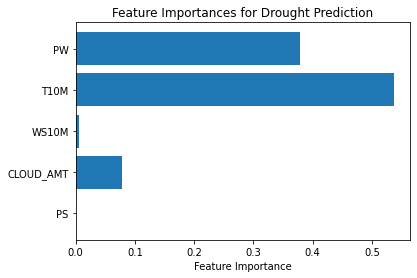

In [0]:
# Preprocess data: add more relevant features and the target variable (e.g., drought occurrence), avg(EVLAND)=23.974508514190507
data = origin_df.withColumn("EVLAND", (origin_df["EVLAND"] < 23.97450851419052 * 2).cast("integer"))

# Prepare the dataset for machine learning: split into training and testing sets
train_data, test_data = data.randomSplit([0.6, 0.4], seed=42)

# Define the feature columns
feature_columns = ["PS", "CLOUD_AMT", "WS10M", "T10M", "PW"]  # Add more relevant features here

# Create a VectorAssembler to combine feature columns into a single feature vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(labelCol="EVLAND", featuresCol="features", numTrees=300, maxDepth=3, seed=42)

# Create a pipeline to preprocess data and train the model
pipeline = Pipeline(stages=[vector_assembler, random_forest])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test dataset
predictions = model.transform(test_data)

# Evaluate the model's performance
evaluator = MulticlassClassificationEvaluator(
    labelCol="EVLAND", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)

print("Test Accuracy = {:.2f}".format(accuracy))

# Extract feature importances from the trained model
feature_importances = model.stages[-1].featureImportances.toArray()

# Create a horizontal bar chart to visualize feature importances
plt.barh(range(len(feature_columns)), feature_importances, align='center')
plt.yticks(range(len(feature_columns)), feature_columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Drought Prediction')
plt.show()

In [0]:
predictions.take(10)

Out[30]: [Row(_c0='10', YEAR=1981, DOY=1, T10M=11.72, CLOUD_AMT=61.397109077812026, QV10M=3.91, PW=2.4299619817471223, PS=99.87, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=2.41, EVLAND=1, latitude=30.0443879, longitude=31.2357257, City='Cairo', month='1', features=DenseVector([99.87, 61.3971, 2.41, 11.72, 2.43]), rawPrediction=DenseVector([6.4864, 93.5136]), probability=DenseVector([0.0649, 0.9351]), prediction=1.0),
 Row(_c0='10001', YEAR=1981, DOY=201, T10M=26.92, CLOUD_AMT=61.397109077812026, QV10M=9.34, PW=2.4299619817471223, PS=98.86, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=5.33, EVLAND=1, latitude=37.9839412, longitude=23.7283052, City='Athens', month='7', features=DenseVector([98.86, 61.3971, 5.33, 26.92, 2.43]), rawPrediction=DenseVector([25.3566, 74.6434]), probability=DenseVector([0.2536, 0.7464]), prediction=1.0),
 Row(_c0='10003', YEAR=1981, DOY=201, T10M=22.15, CLOUD_AMT=61.397109077812026, QV10M=8.61, PW=2.4299619817471223, PS=98.61, GLOBAL_ILLUMINANCE=34868.50815731

In [0]:
from pyspark.sql.functions import lit

In [0]:
baseline_prediction = predictions.withColumn("prediction", lit(1.0))
baseline_prediction.take(10)

Out[39]: [Row(_c0='0', YEAR=1981, DOY=1, T10M=4.82, CLOUD_AMT=61.397109077812026, QV10M=3.54, PW=2.4299619817471223, PS=101.68, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=13.59, EVLAND=1, latitude=52.3730796, longitude=4.8924534, City='Amsterdam', month='1', features=DenseVector([101.68, 61.3971, 13.59, 4.82, 2.43]), rawPrediction=DenseVector([39.7296, 260.2704]), probability=DenseVector([0.1324, 0.8676]), prediction=1.0),
 Row(_c0='10', YEAR=1981, DOY=1, T10M=11.72, CLOUD_AMT=61.397109077812026, QV10M=3.91, PW=2.4299619817471223, PS=99.87, GLOBAL_ILLUMINANCE=34868.50815731465, WS10M=2.41, EVLAND=1, latitude=30.0443879, longitude=31.2357257, City='Cairo', month='1', features=DenseVector([99.87, 61.3971, 2.41, 11.72, 2.43]), rawPrediction=DenseVector([39.7296, 260.2704]), probability=DenseVector([0.1324, 0.8676]), prediction=1.0),
 Row(_c0='1000', YEAR=1981, DOY=21, T10M=0.59, CLOUD_AMT=61.397109077812026, QV10M=3.54, PW=2.4299619817471223, PS=102.66, GLOBAL_ILLUMINANCE=34868.508157314

In [0]:
baseline_accuracy = evaluator.evaluate(baseline_prediction)

print("Test Accuracy = {:.2f}".format(baseline_accuracy))

Test Accuracy = 0.87


In [0]:
average_data = origin_df.groupBy("latitude", "longitude", "year") \
    .agg({"T10M": "avg", "QV10M": "avg", "GLOBAL_ILLUMINANCE": "avg", "WS10M" : "avg", "CLOUD_AMT" : "avg"}) \
    .withColumnRenamed("avg(T10M)", "avg_temperature") \
    .withColumnRenamed("avg(QV10M)", "avg_humidity") \
    .withColumnRenamed("avg(GLOBAL_ILLUMINANCE)", "avg_solar_radiation")\
    .withColumnRenamed("avg(WS10M)", "avg_windspeed") \
    .withColumnRenamed("avg(CLOUD_AMT)", "avg_cloud")\

# Choose the columns you want to use in the parallel coordinates plot
columns = ["avg_temperature", "avg_humidity", "avg_solar_radiation", "avg_windspeed", "avg_cloud" ]

# Convert the PySpark DataFrame to a Pandas DataFrame
data_pd = average_data.select(columns).toPandas()

# Create a parallel coordinates plot using Plotly
fig = px.parallel_coordinates(data_pd, dimensions=columns,color = "avg_temperature",  labels=dict(zip(columns, columns)))

# Update the layout of the plot
fig.update_layout(title="Parallel Coordinates Plot of Meteorological Variables")

# Show the plot
fig.show()